In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error

In [2]:
# loading the dataset
df=pd.read_csv('Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# checking for NULL values and eliminating them

In [5]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
#dropping salary column 
df.drop('salary',axis=1,inplace=True)
df.drop('sl_no',axis=1,inplace=True)

In [7]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [8]:
# visualizing the data

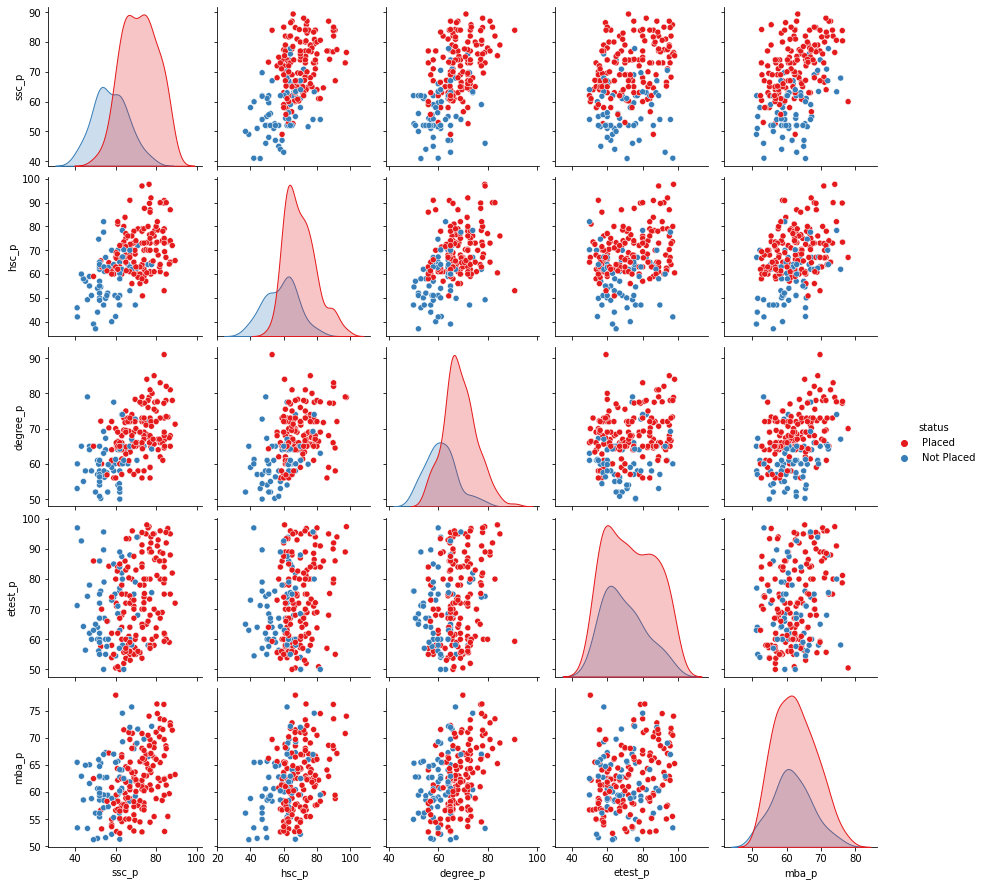

In [9]:
# plotting a pairplot
sns.pairplot(data=df,hue='status',palette='Set1')

<AxesSubplot:xlabel='workex', ylabel='count'>

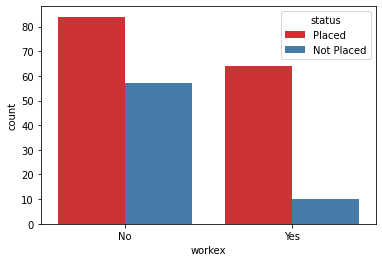

In [10]:
# plotting a countplot
sns.countplot(data=df,x='workex',hue='status',palette='Set1')

<AxesSubplot:xlabel='gender', ylabel='count'>

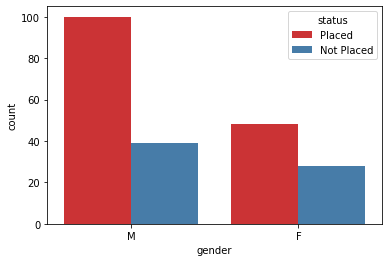

In [11]:
sns.countplot(data=df,x='gender',hue='status',palette='Set1')

<AxesSubplot:xlabel='specialisation', ylabel='count'>

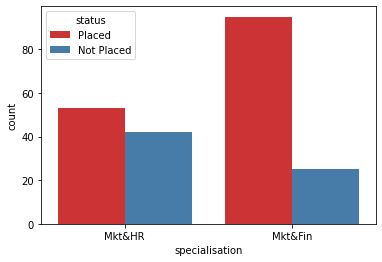

In [12]:
sns.countplot(data=df,x='specialisation',hue='status',palette='Set1')

<AxesSubplot:xlabel='degree_t', ylabel='count'>

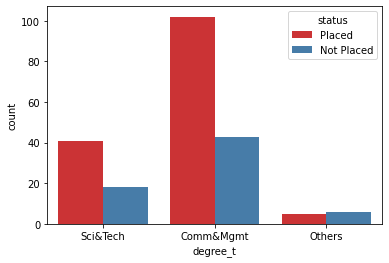

In [13]:
sns.countplot(data=df,x='degree_t',hue='status',palette='Set1')

<AxesSubplot:xlabel='etest_p', ylabel='Density'>

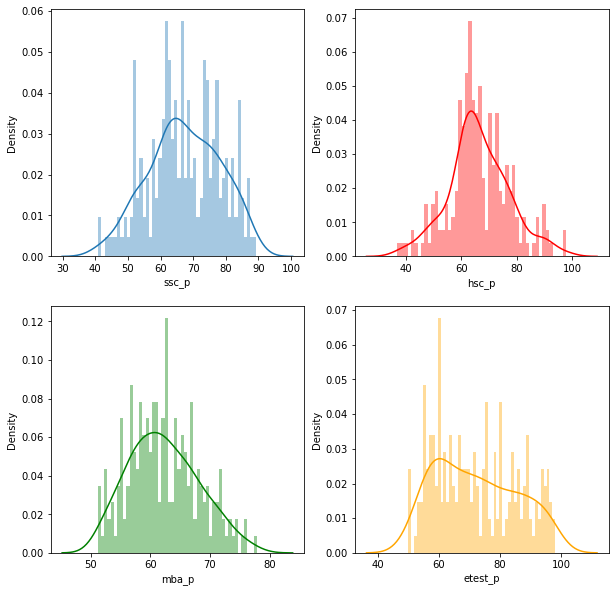

In [15]:
# plotting various exam percentages
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df['ssc_p'],bins=50,)

plt.subplot(2,2,2)
sns.distplot(df['hsc_p'],bins=50,color='red')

plt.subplot(2,2,3)
sns.distplot(df['mba_p'],bins=50,color='green')

plt.subplot(2,2,4)
sns.distplot(df['etest_p'],bins=50,color='orange')

<AxesSubplot:>

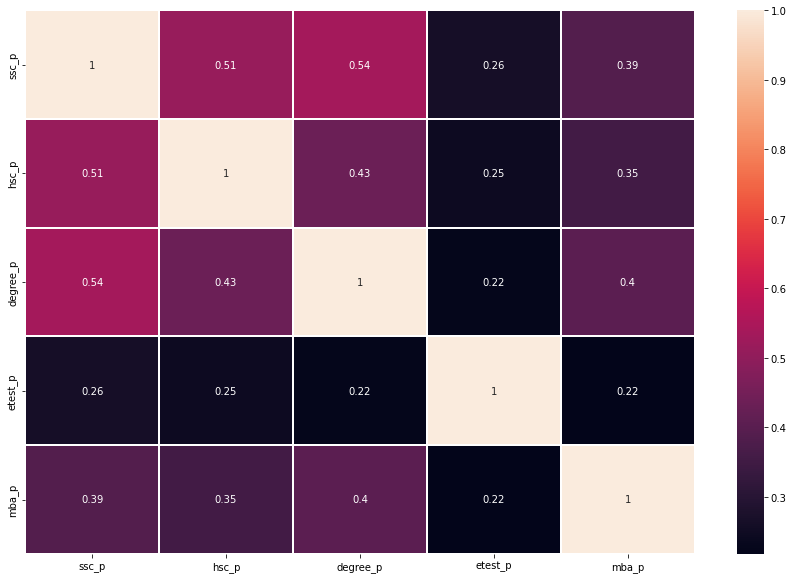

In [16]:
# to check correlation among various percentages using heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2)

In [17]:
# dropping columns that do not affect the classification
df.drop('hsc_b',axis=1,inplace=True)
df.drop('ssc_b',axis=1,inplace=True)
df.drop('hsc_s',axis=1,inplace=True)

In [18]:
# changing values of columns to numbers
d1=pd.get_dummies(df['gender'],drop_first=True)
d2=pd.get_dummies(df['degree_t'],drop_first=True)
d3=pd.get_dummies(df['specialisation'],drop_first=True)
d4=pd.get_dummies(df['workex'],drop_first=True)
df=pd.concat([df,d1,d2,d3,d4],axis=1)
df.drop(['gender','workex','degree_t','specialisation'],axis=1,inplace=True)
labenc=LabelEncoder()
df['status']=labenc.fit_transform(df['status'])

In [19]:
# viewing the data
df.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,M,Others,Sci&Tech,Mkt&HR,Yes
0,67.00,91.00,58.00,55.0,58.80,1,1,0,1,1,0
1,79.33,78.33,77.48,86.5,66.28,1,1,0,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,1,0,0,0,0
3,56.00,52.00,52.00,66.0,59.43,0,1,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,0


In [20]:
# splitting dataset into train data and test data
# train data- 70%
# test data- 30%
X=df.drop('status',axis=1)
y=df['status']

In [21]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [22]:
# scaling the data
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

In [23]:
# model accuracy
logreg=LogisticRegression()
logreg.fit(Xtrain,ytrain)
ypred=logreg.predict(Xtest)
print('ACCURACY: {}%'.format(round(accuracy_score(ytest,ypred)*100,2)))

ACCURACY: 89.23%


<AxesSubplot:xlabel='status', ylabel='Density'>

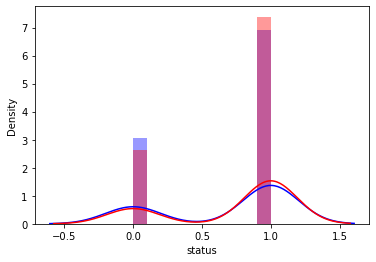

In [24]:
# now we will check the difference in predicted and actual plot
sns.distplot(ytest,bins=10,color='blue')
sns.distplot(ypred,bins=10,color='red')

In [25]:
# classification report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.90      0.96      0.92        45

    accuracy                           0.89        65
   macro avg       0.89      0.85      0.87        65
weighted avg       0.89      0.89      0.89        65



In [ ]:
# therefore, the prediction accuracy of our model using Logistic Regression is 89%